<a href="https://colab.research.google.com/github/Guillermina86/Procesamiento-digital-de-imagenes/blob/main/TP2_PDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen. Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) y/o de IQ (para cambiar la saturación). Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.




### Importamos las librerías que necesitamos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as io

### Funciones a utilizar

In [79]:
# Función para ver una imagen
def get_image(rute):
  imagen = io.imread(rute)
  imagen = imagen.astype(np.int)
  return imagen

# Descomponer la imagen en sus compomentes RGB
def imagen2rgb(imagen):
  r = imagen[:,:,0]
  g = imagen[:,:,1]
  b = imagen[:,:,2]
  return r, g, b

# Construir Imagen a partir de sus componentes RGB
def rgb_to_image(r,g,b):
  Shape = r.shape
  im_out = np.zeros((Shape[0], Shape[1], 3))
  im_out[:,:,0] = r
  im_out[:,:,1] = g
  im_out[:,:,2] = b
  return im_out.astype(np.uint8)

# Función para pasar del espacio de color RGB a YIQ
def rgb2yiq(imagen):
    yiq = np.zeros(imagen.shape)  # creo una matriz con 0 del tamaño de la imagen de entrada
    yiq[:,:,0] = imagen[:,:,0] * 0.299 + imagen[:,:,1] * 0.587 + imagen[:,:,2] * 0.114
    yiq[:,:,1] = imagen[:,:,0] * 0.595716 + imagen[:,:,1] * -0.274453 + imagen[:,:,2] * -0.321263
    yiq[:,:,2] = imagen[:,:,0] * 0.211456 + imagen[:,:,1] * -0.522591 + imagen[:,:,2] * 0.311135
    return yiq

# Descomponer la imagen en sus compomentes YIQ
def imagen2yiq(yiq):
    y = yiq[:,:,0]
    i = yiq[:,:,1]
    q = yiq[:,:,2]
    return y, i, q

# Construir Imagen a partir de sus componentes YIQ
def yiq_to_image(y,i,q):
    Shape = r.shape
    im_out2 = np.zeros((Shape[0], Shape[1], 3))
    im_out2[:,:,0] = y
    im_out2[:,:,1] = i
    im_out2[:,:,2] = q
    return im_out2

# Función para pasar del espacio de color YIQ a RGB
def yiq2rgb(yiq):
    rgb = np.zeros(yiq.shape)
    rgb[:,:,0] = yiq[:,:,0] * 1 + yiq[:,:,1] * 0.9663 + yiq[:,:,2] * 0.6210
    rgb[:,:,1] = yiq[:,:,0] * 1 + yiq[:,:,1] * -0.2721 + yiq[:,:,2] * -0.6474
    rgb[:,:,2] = yiq[:,:,0] * 1 + yiq[:,:,1] * -1.1070 + yiq[:,:,2] * 1.7046

    rgb = np.clip(rgb, 0, 1)      # Matriz que contiene elementos para recortar, valor mínimo y máximo.
    return rgb


# Plotear Imagen
def plot_image(im, title, cmap=None):
  fig, ax = plt.subplots(dpi=100)
  ax.imshow(im, cmap=cmap)
  ax.set_title(title)
  plt.axis('off')
  plt.show()

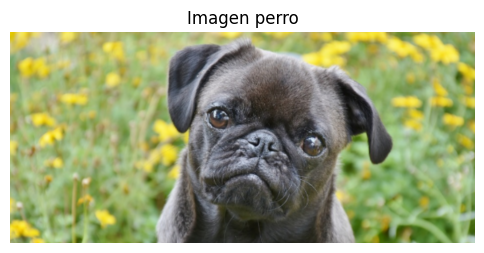

In [80]:
perro = 'https://frontlinemascotas.es/sites/phc_es.frontline.com/files/styles/page_blog_hero__990x450_/public/blog/Dise%C3%B1o%20sin%20t%C3%ADtulo%20%281%29_3.png?itok=9EU0QVLr'
imagen = get_image(perro)
plot_image(imagen, 'Imagen perro')

In [81]:
# Hacemos una copia de la imagen para no modificar la original.
im_work = np.copy(imagen)

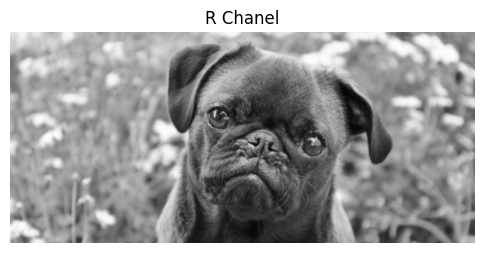

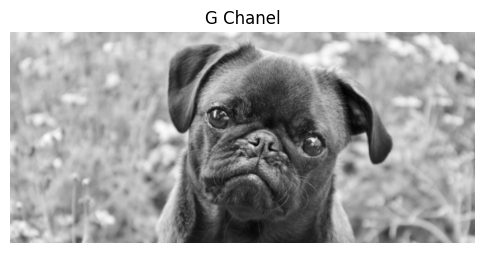

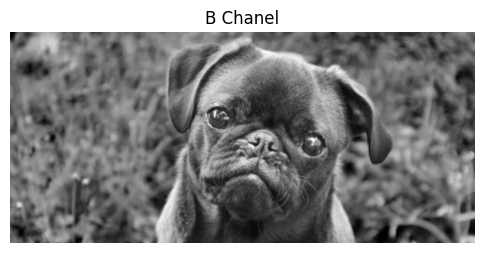

In [82]:
# Visualización de los canales RGB por separado.

plot_image(im_work[:,:,0], 'R Chanel', cmap='gray')
plot_image(im_work[:,:,1], 'G Chanel', cmap='gray')
plot_image(im_work[:,:,2], 'B Chanel', cmap='gray')

In [83]:
# Descomponemos la imagen en sus componentes RGB
r, g, b = imagen2rgb(im_work)

[[209.7 207.9 207.  ... 138.6 139.5 140.4]
 [209.7 207.9 206.1 ... 136.8 136.8 137.7]
 [209.7 207.9 206.1 ... 135.  135.  135. ]
 ...
 [151.2 146.7 141.3 ... 170.1 169.2 167.4]
 [154.8 150.3 144.9 ... 170.1 169.2 167.4]
 [159.3 153.9 148.5 ... 169.2 167.4 166.5]]


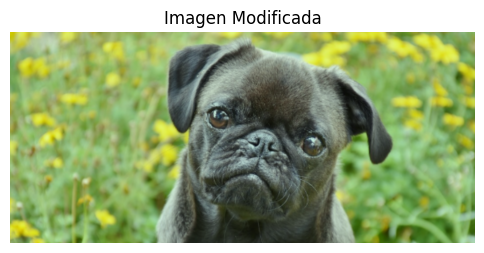

In [84]:
#@title Alteración de los canales mediante un factor { run: "auto" }

factor_r = 0.9 #@param {type:"slider", min:0, max:5, step:0.1}
factor_g = 1 #@param {type:"slider", min:0, max:5, step:0.1}
factor_b = 0.9 #@param {type:"slider", min:0, max:5, step:0.1}

r2 = np.clip(r * factor_r, 0, 255)
g2 = np.clip(g * factor_g, 0, 255)
b2 = np.clip(b * factor_b, 0, 255)
print(r2)

im_out = rgb_to_image(r2,g2,b2)
plot_image(im_out, 'Imagen Modificada')

# Save image
io.imwrite('im_out.png', im_out)

In [100]:
im_norm = im_work/255
perro_yiq = rgb2yiq(im_norm)
y, i, q = imagen2yiq(perro_yiq)

[[0.82389569 0.81681686 0.80849569 ... 0.72355843 0.72583176 0.72859686]
 [0.82143686 0.81435804 0.80727922 ... 0.71443922 0.71591451 0.71818784]
 [0.82249373 0.81590667 0.80629569 ... 0.70482824 0.70327961 0.70173098]
 ...
 [0.69822392 0.6912098  0.67988196 ... 0.88098353 0.87969373 0.86853412]
 [0.71547882 0.70593255 0.69460471 ... 0.87950824 0.87821843 0.86909922]
 [0.73353176 0.71967176 0.70581176 ... 0.87322745 0.86811569 0.8633102 ]]


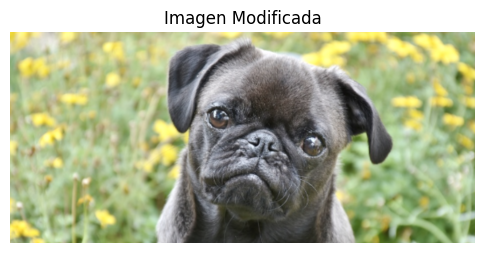

In [128]:
#@title Alteración de los canales YIQ mediante un factor. { run: "auto" }

fact_a = 1.1 #@param {type:"slider", min:0, max:3, step:0.1}
fact_b = 0.8 #@param {type:"slider", min:0, max:3, step:0.1}

y2 = np.clip(y * fact_a, 0, 1)
i2 = np.clip(i * fact_b, -0.5957, 0.5957)
q2 = np.clip(q * fact_b, -0.5226, 0.5226)
print(y2)

im_out2 = yiq_to_image(y2,i2,q2)
perro_2 = yiq2rgb(im_out2)
plot_image(perro_2, 'Imagen Modificada')

# Save image
#io.imwrite('im_out.png', im_out)

### Utilizar algunos datasets 2D (pueden ser mapas de altitud, de temperatura, etc.) y “visualizarlos” con diferentes paletas, incluyendo la de niveles de gris y la arco iris.

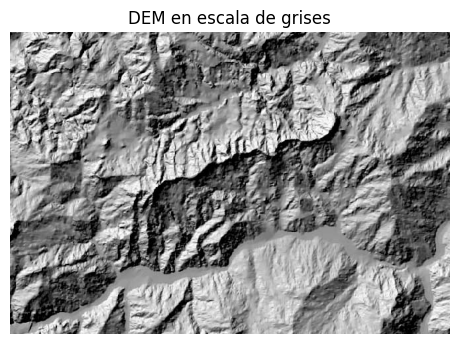

In [123]:
mapa = 'https://upload.wikimedia.org/wikipedia/commons/4/45/Dem.jpg'
imagen_mapa = get_image(mapa)
plot_image(imagen_mapa, 'DEM en escala de grises')

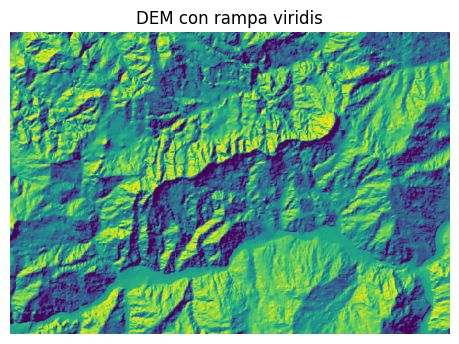

In [122]:
plot_image(imagen_mapa[:,:,1], 'DEM con rampa viridis' , cmap='viridis')

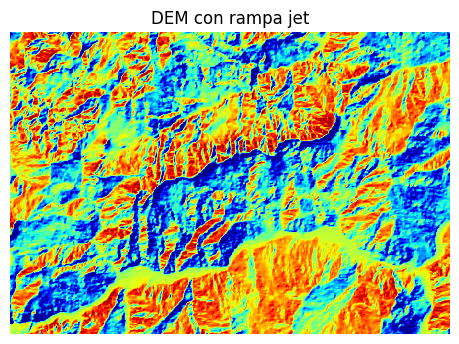

In [124]:
plot_image(imagen_mapa[:,:,1], 'DEM con rampa jet' , cmap='jet')

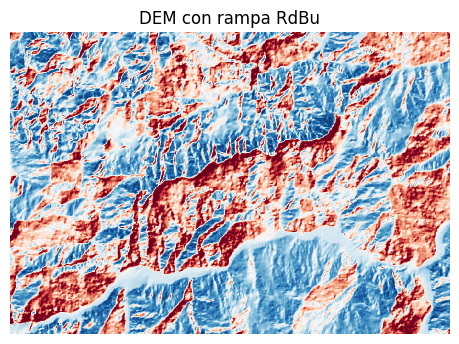

In [125]:
plot_image(imagen_mapa[:,:,1], 'DEM con rampa RdBu' , cmap='RdBu')

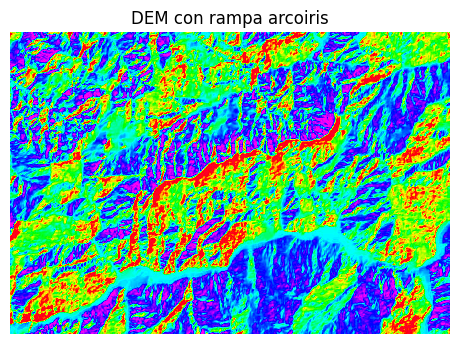

In [126]:
plot_image(imagen_mapa[:,:,1], 'DEM con rampa arcoiris' , cmap='gist_rainbow')